# 주성분분석(PCA) 적용하기

## 해결하고 싶었던 문제
* 배경 : 유저리서치 진행중 사용자별 목적(쇼핑, 성분, 혜택) 이 존재하는것을 확인 할 수 있었음
* 문제 : 위 가설을 데이터로 사용자의 액션(기능)을 기반으로 몇개의 축(목적)으로 분리 또는 축약하고 싶었음

## 방법 모색
* 차원축소 : 비슷한 변수를 묶는 방법
    * PCA(주성분분석) : 변수의 요약
    * FA(인자분석) : 잠재변수 찾기
* 군집화 : 비슷한 케이스를 묶는 방법 $\rightarrow$ 각각의 군집으로부터 특징을 뽑아냄 

* 고려사항
    * 기능의 조합이 너무 많기때문에 정보를 일부 잃더라고 차원을 축소해야함(3~4차원)
    * 이때 차원의 축소는 변수를 선택하는 방법이 아닌 기능의 조합들로 표현되어야함

## PCA
### 개념
* 정의 : 변수들의 **선형결합**을 통해 차원을 축소하는 방법

#### 2차원 예제

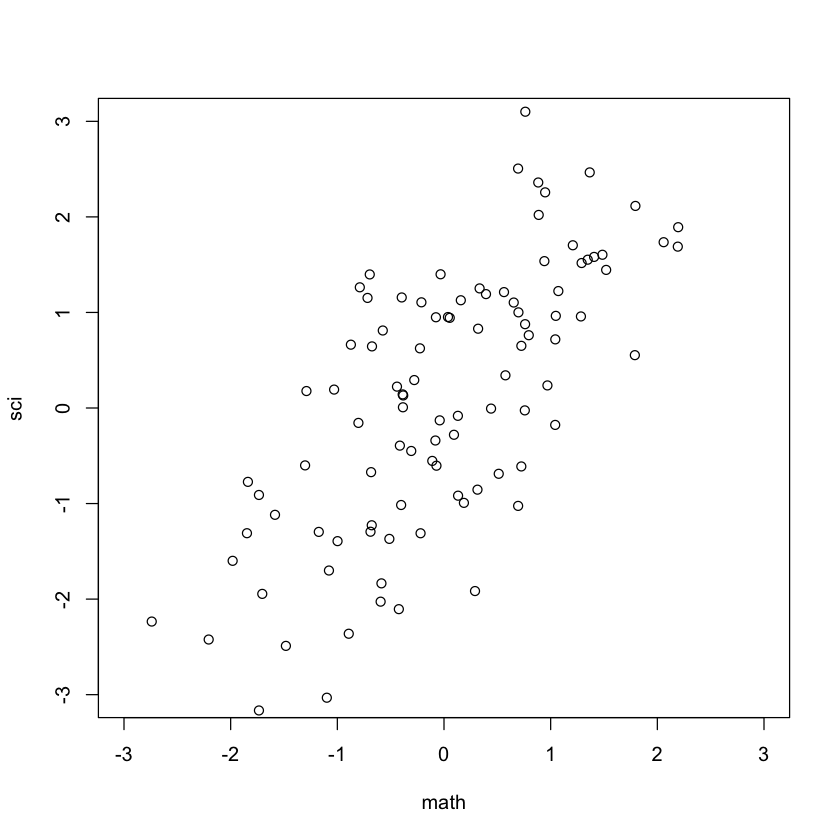

In [31]:
math<-rnorm(100)
noise1<-rnorm(100)
sci<-math+noise1
#sci<-math+0.1*noise1
plot(math,sci,xlim=c(-3,3),ylim=c(-3,3))

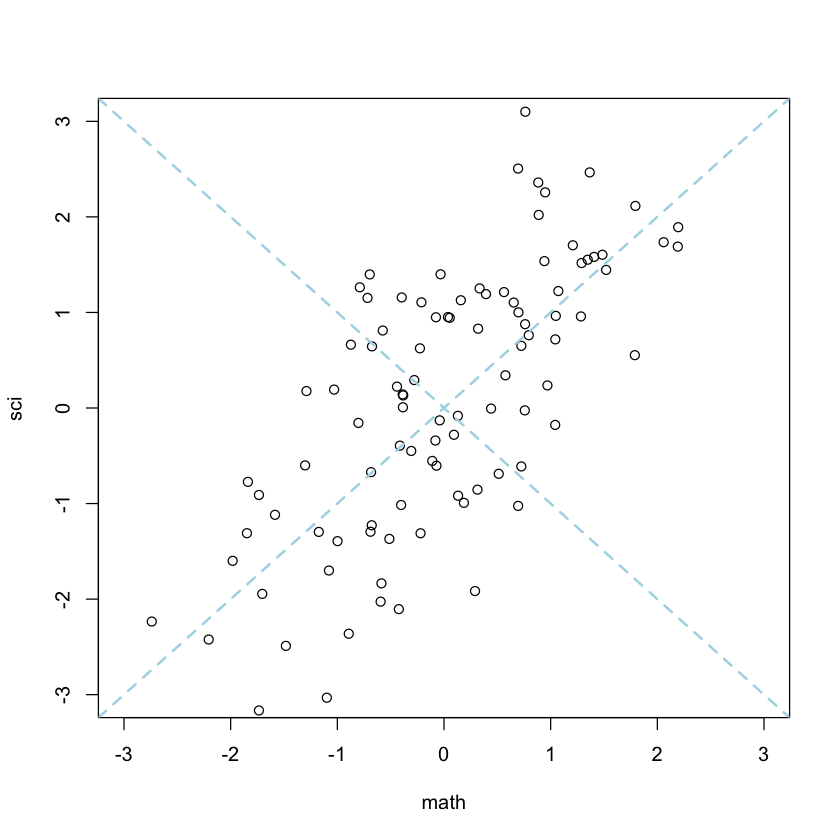

In [33]:
plot(math,sci,xlim=c(-3,3),ylim=c(-3,3))
abline(a=0,b=1,col='lightblue',lty=2,lwd=2)
abline(a=0,b=-1,col='lightblue',lty=2,lwd=2)

> 데이터의 변동을 잘 설명하는 축을 찾음  


> 참고) covariance matrix -> 고유값분해(eigen vector,eigen value)  
>> eigen vector : 주축방향 , eigen value 주축의 설명분산

In [34]:
library("psych")
x<-data.frame(math,sci)
pca_fit<-principal(x, nfactors=2,rotate="none",normalize=FALSE)
pca_fit

Principal Components Analysis
Call: principal(r = x, nfactors = 2, rotate = "none", normalize = FALSE)
Standardized loadings (pattern matrix) based upon correlation matrix
      PC1   PC2 h2      u2 com
math 0.93 -0.38  1 2.2e-16 1.3
sci  0.93  0.38  1 2.2e-16 1.3

                       PC1  PC2
SS loadings           1.72 0.28
Proportion Var        0.86 0.14
Cumulative Var        0.86 1.00
Proportion Explained  0.86 0.14
Cumulative Proportion 0.86 1.00

Mean item complexity =  1.3
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0 
 with the empirical chi square  0  with prob <  NA 

Fit based upon off diagonal values = 1

> Proportion Explained : 분산 설명 비율  
> loadings : 주축(PC)

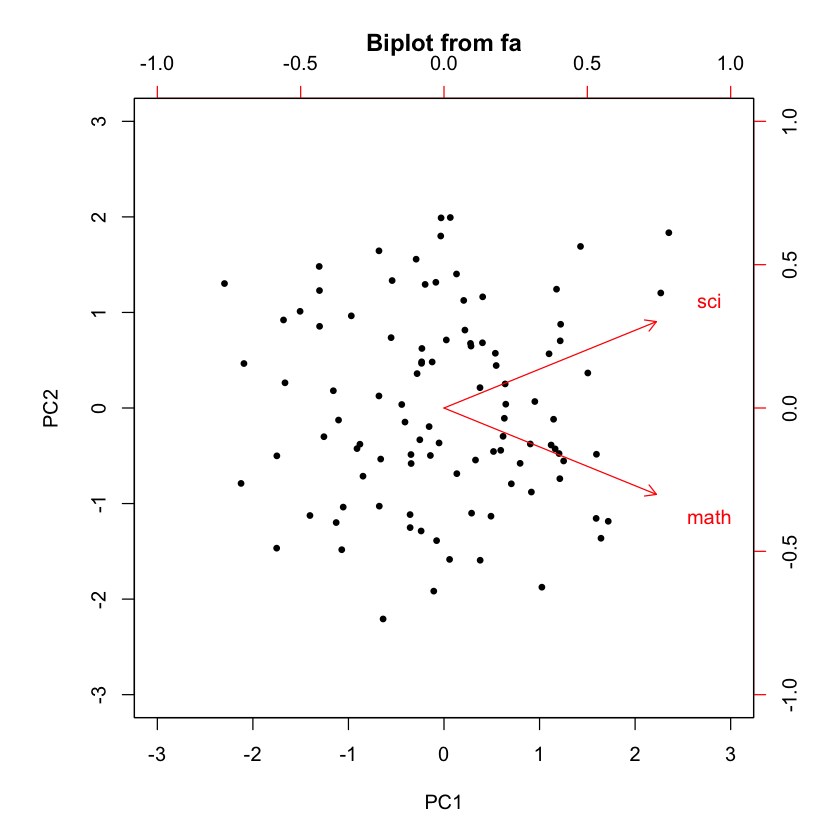

In [35]:
biplot(pca_fit)

> biplot 그래프 : 변수간의 관계, 변수와 데이터의 관계를 볼수 있음

* 각도
    * 사이각이 작을 수록 유사함
* 길이
    * 영향도
* 점
    * 데이터 ~ ex) math에 가까운 데이터는 math점수가 상대적으로 높음


> 차원 축소 : n 번째까지 주성분 선택, 주성분점수로 데이터 변환 
* 주성분점수 : 데이터를 주축으로 정사영 시킨값 
    * ex) i번째 데이터의 제1주성분 점수 , $l_i$ 는 loading값
    $$score_i = l_1 \times math_i + l_2\times sci_i$$

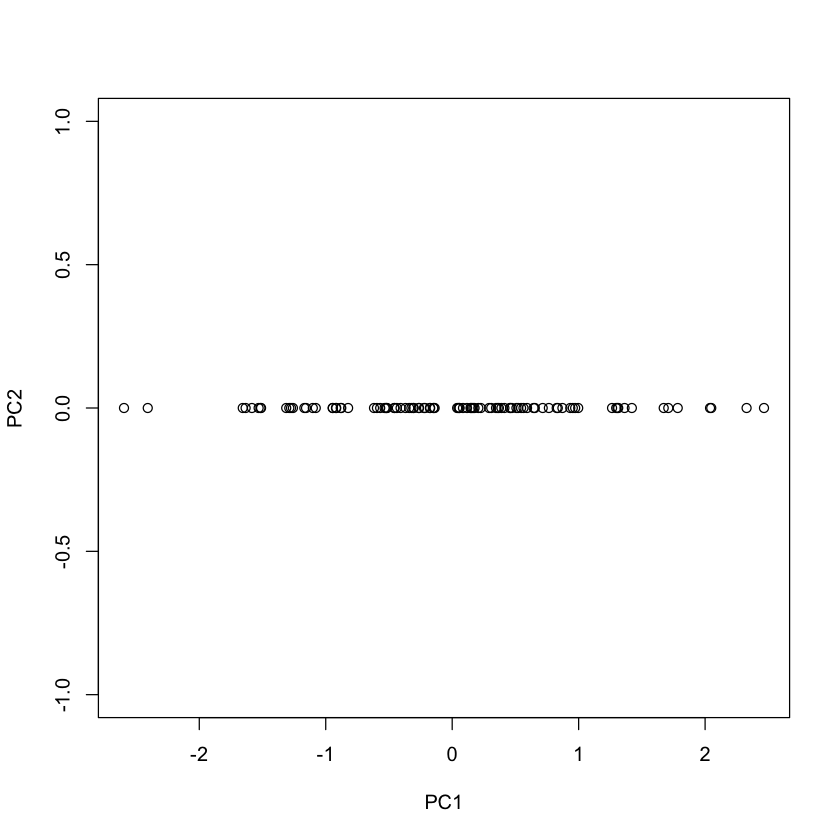

In [16]:
plot(cbind(pca_fit$score[,1],0),xlab='PC1',ylab='PC2')

#### 4차원 예제


Loadings:
     PC1    PC2   
math  0.733 -0.557
sci   0.676 -0.629
kor   0.722  0.569
eng   0.680  0.622

                 PC1   PC2
SS loadings    1.978 1.416
Proportion Var 0.495 0.354
Cumulative Var 0.495 0.849

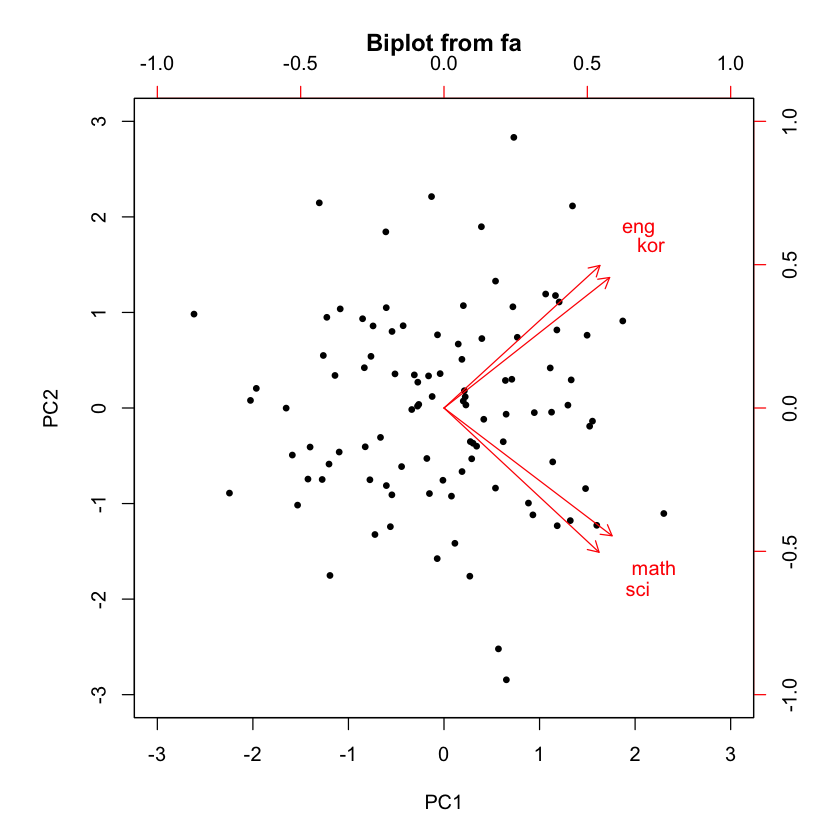

In [17]:
kor<-rnorm(100)
noise2<-rnorm(100)
eng<-kor+noise2

x<-data.frame(math,sci,kor,eng)
#pca_fit <- prcomp(x)
pca_fit <- principal(x, nfactors=2,rotate="none")
pca_fit$loading
biplot(pca_fit)

> 회전

* *Varimax(배리멕스)* : 분산의 극대화하는 직교 회전
* 각 주성분들이 로딩이 구분이 잘됨 = 해석이 편함

In [19]:
pca_fit_rotated <- principal(x, nfactors=2,rotate="varimax")
pca_fit_rotated$loading


Loadings:
     RC1   RC2  
math 0.914 0.111
sci  0.923      
kor  0.121 0.911
eng        0.920

                 RC1   RC2
SS loadings    1.705 1.689
Proportion Var 0.426 0.422
Cumulative Var 0.426 0.849

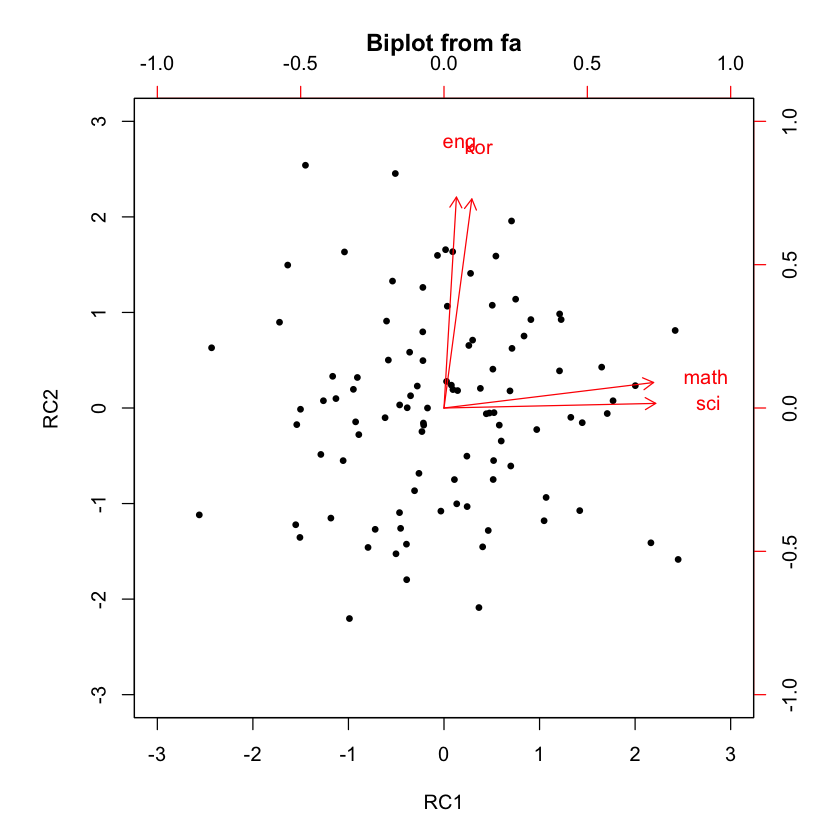

In [20]:
biplot(pca_fit_rotated)

> 실제 데이터와 주성분점수 확인해보기

In [26]:
x[1,]
t(pca_fit_rotated$score[1,])

,math,sci,kor,eng
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.2545815,-1.295,0.2020302,0.5875164


RC1,RC2
-0.9066437,0.3195103


#### 주의
* 아웃라이어 : 축을 찾기때문에 아웃라이어의 영향을 크게 받음

## 실제 PCA 적용 
* 핵심 기능을 선택(14개의 기능)
* 사용자별 기능별 경험수를 집계
* 위 데이터로 PCA진행
* 50% 분산을 설명하는 4개의 주성분으로 축약
* 주성분에 대한 해석이 편하도록 회전을 취함
* 각각의 주성분의 로딩값으로 주성분의 특징을 파악